# Final assignment: Applied economics analysis 2017

### The effect of inflation on consumer confidence in the Netherlands
 Edgar Brouwer (430777), Jocelyne Mwana Isha (676027) & Arjan Spaans (181637)
 
### Research question
 Does inflation affect consumer confidence?
 
### Motivation
Over the last thirty years the Dutch economy has shown multiple business cycles. The Dutch agency for statistics (CBS) [shows](https://www.cbs.nl/nl-nl/visualisaties/conjunctuurklok) the state of the economy as an aggregation of economic variables. Some of these variables are precursors of the cycle. One of these variables is 'consumer confidence'. Consumer confidence is defined as an indicator which expresses the degree of households' confidence regarding the current and expected economic state of a country. From this point of view it is interesting to examine how this confidence is built. In this assignment we focus on the relation between consumer confidence and inflation. Inflation is an economic variable which is not included in the business cycle clock of the CBS. In addition, it is reasonable to assume that inflation affects consumer confidence since market prices include information. 
 
### Answer
After analyzing the data we can conclude that inflation affects consumer confidence. An increase of inflation by 1 decreases consumer confidence by 280 percentage points. Further research should focus on including control variables in the regression model.
 
### Method
To examine whether inflation influences consumer confidence we imported data from CBS (StatLine). We worked with time series data (monthly) starting in 1987 and finishing in 2016. We decided to not include any control variables. Therefore, the regression looks as follows: $Consumerconfidence \, \tau = \alpha_0 + \beta_1 Inflation t + \epsilon_t$   

### Assumptions
To produce good estimates the Gauss-Markov assumptions need to hold. The Gauss-Markov assumptions are listed [here](http://econweb.rutgers.edu/tsurumi/blue1.pdf).
 
### Importing libraries and data
In this assignment we use the following packages: 
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Data
The dataset is retrieved from CBS StatLine, the database of the CBS. The first monthly observation was in January 1987 and the last monthly observation was in December 2016. January 1987 was the first observation we could acquire for both variables 'inflation' and 'consumer confidence'. Below an example of the first five months in the dataset:
 
 
 

In [9]:
data = pd.read_csv('datapython6.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

    Months  inflation  consumerconfidence
0  1987-01       -1.3                  10
1  1987-02       -1.2                  10
2  1987-03       -1.1                   3
3  1987-04       -1.1                   2
4  1987-05       -1.1                   0

 Data Types:
Months                 object
inflation             float64
consumerconfidence      int64
dtype: object


In [10]:
# We make Pandas aware that we use time series data.
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('datapython6.csv', parse_dates='Months', index_col='Months', date_parser=dateparse)
print data.head()

            inflation  consumerconfidence
Months                                   
1987-01-01       -1.3                  10
1987-02-01       -1.2                  10
1987-03-01       -1.1                   3
1987-04-01       -1.1                   2
1987-05-01       -1.1                   0


In [11]:
data.index

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name=u'Months', length=360, freq=None)

In [12]:
# Here we show the data of the variable 'inflation'.
ts = data['inflation']
ts.head(360)

Months
1987-01-01   -1.3
1987-02-01   -1.2
1987-03-01   -1.1
1987-04-01   -1.1
1987-05-01   -1.1
1987-06-01   -0.8
1987-07-01    0.1
1987-08-01    0.2
1987-09-01    0.2
1987-10-01    0.1
1987-11-01   -0.1
1987-12-01   -0.2
1988-01-01    0.6
1988-02-01    0.5
1988-03-01    0.7
1988-04-01    0.7
1988-05-01    0.7
1988-06-01    0.8
1988-07-01    1.0
1988-08-01    0.9
1988-09-01    0.9
1988-10-01    0.7
1988-11-01    1.0
1988-12-01    1.2
1989-01-01    0.8
1989-02-01    0.9
1989-03-01    0.8
1989-04-01    1.1
1989-05-01    1.0
1989-06-01    1.0
             ... 
2014-07-01    0.9
2014-08-01    1.0
2014-09-01    0.9
2014-10-01    1.1
2014-11-01    1.0
2014-12-01    0.7
2015-01-01    0.0
2015-02-01    0.2
2015-03-01    0.4
2015-04-01    0.6
2015-05-01    1.1
2015-06-01    1.0
2015-07-01    1.0
2015-08-01    0.8
2015-09-01    0.6
2015-10-01    0.6
2015-11-01    0.7
2015-12-01    0.7
2016-01-01    0.6
2016-02-01    0.6
2016-03-01    0.6
2016-04-01    0.0
2016-05-01    0.0
2016-06-01    0.0
201

In [7]:
# Here we show the data of the variable 'consumerconfidence'.
ts2 = data['consumerconfidence']
ts2.head(360)

Months
1987-01-01    10
1987-02-01    10
1987-03-01     3
1987-04-01     2
1987-05-01     0
1987-06-01    -4
1987-07-01    -6
1987-08-01    -5
1987-09-01     1
1987-10-01    -6
1987-11-01    -8
1987-12-01    -7
1988-01-01    -2
1988-02-01     0
1988-03-01    -3
1988-04-01     1
1988-05-01     1
1988-06-01    -1
1988-07-01     2
1988-08-01     7
1988-09-01     4
1988-10-01     5
1988-11-01     7
1988-12-01     5
1989-01-01    15
1989-02-01    13
1989-03-01    13
1989-04-01    12
1989-05-01    11
1989-06-01    13
              ..
2014-07-01    -1
2014-08-01    -4
2014-09-01    -8
2014-10-01    -6
2014-11-01   -11
2014-12-01   -11
2015-01-01    -3
2015-02-01    -6
2015-03-01     2
2015-04-01     2
2015-05-01     4
2015-06-01     8
2015-07-01     6
2015-08-01     8
2015-09-01     5
2015-10-01     3
2015-11-01     5
2015-12-01     3
2016-01-01     7
2016-02-01    -1
2016-03-01    -4
2016-04-01     2
2016-05-01     2
2016-06-01     6
2016-07-01     2
2016-08-01     4
2016-09-01     8
2016-10

 ### Results
 Below two graphs are presented showing the development of each variable over time.

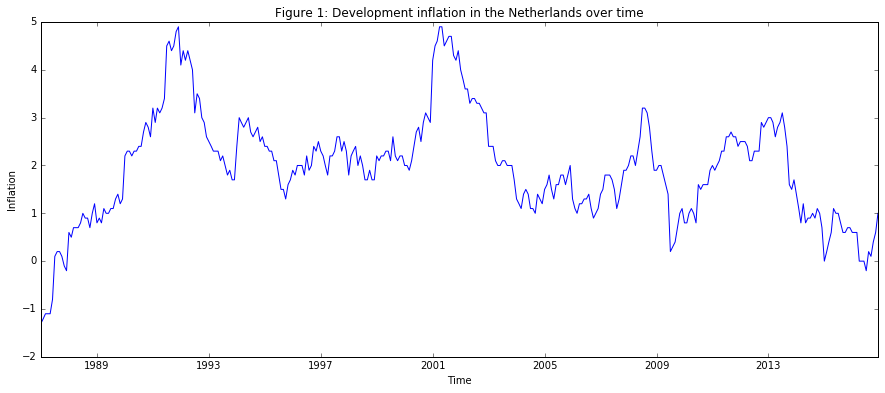

In [13]:
plt.plot(ts)
plt.ylabel('Inflation')
plt.xlabel('Time')
plt.title('Figure 1: Development inflation in the Netherlands over time')
plt.savefig('inflation.png')

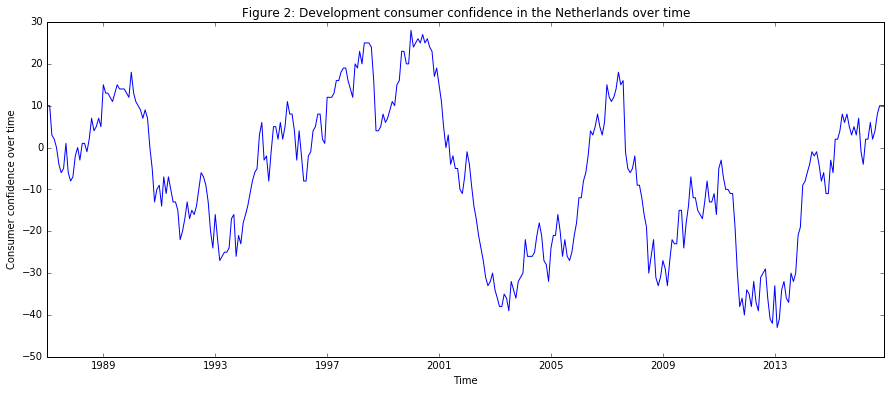

In [7]:
plt.plot(ts2)
plt.ylabel('Consumer confidence over time')
plt.xlabel('Time')
plt.title('Figure 2: Development consumer confidence in the Netherlands over time')
plt.savefig('consumerconfidence.png')

We also checked for stationarity for both variables using a Dickey-Fuller test. For both variables we can conclude stationarity  based on the 5% level. The p-value of the first test, the test with the variable inflation, is 0.047. The p-value of the other test, with the variable consumerconfidecne, is 0.048. 

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # lines for determination of rolling statistics:
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    # lines used for plotting rolling statistics:
    orig = plt.plot(timeseries, color='black',label='Original')
    mean = plt.plot(rolmean, color='blue', label='Rolling mean')
    std = plt.plot(rolstd, color='red', label ='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard deviation')
    plt.show(block=False)
    
    # lines used for performing the Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%5) %key'] = value 
    print dfoutput

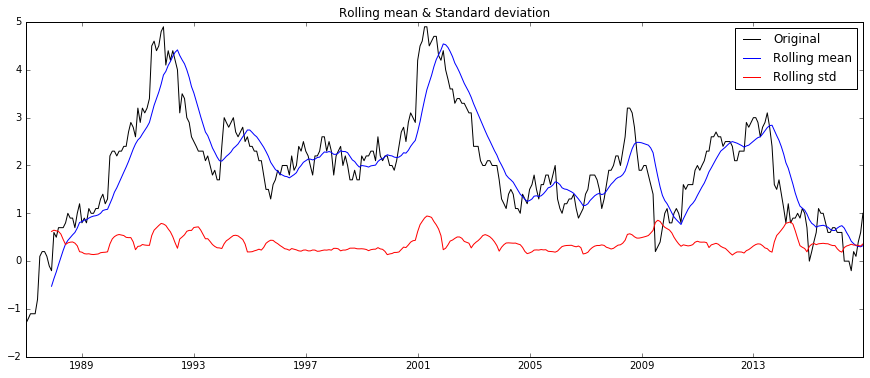

Results of Dickey-Fuller Test:
Test Statistic                  -2.883669
p-value                          0.047280
#Lags Used                      12.000000
Number of Observations Used    347.000000
Critical Value (%s) %key        -2.571227
dtype: float64


In [21]:
test_stationarity(ts['1987-01-01':'2016-12-01'])

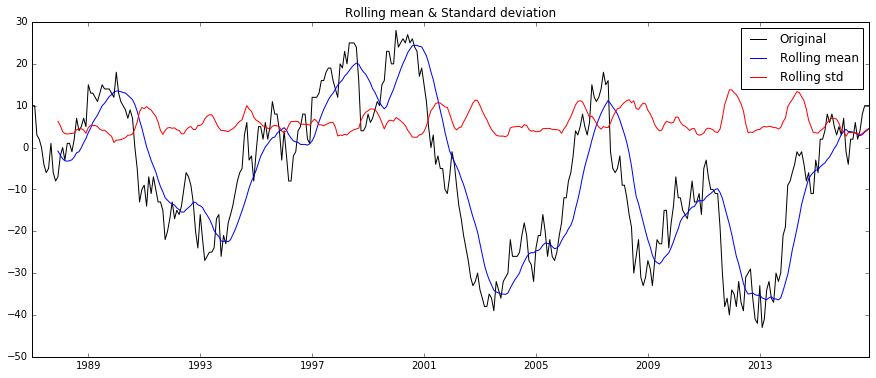

Results of Dickey-Fuller Test:
Test Statistic                  -2.873069
p-value                          0.048571
#Lags Used                      15.000000
Number of Observations Used    344.000000
Critical Value (%5) %key        -2.571266
dtype: float64


In [9]:
test_stationarity(ts2['1987-01-01':'2016-12-01'])

Below shows the OLS analysis after importing some tools.


In [11]:
import statsmodels.formula.api as sm
result = sm.ols(formula='consumerconfidence ~ inflation', data=data ).fit()
print result.params

Intercept   -1.025671
inflation   -2.801463
dtype: float64


In [13]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:     consumerconfidence   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           0.000516
Time:                        14:19:06   Log-Likelihood:                -1529.5
No. Observations:                 360   AIC:                             3063.
Df Residuals:                     358   BIC:                             3071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0257      1.813     -0.566      0.5

The results of the OLS regression show a statistically significant relationship between inflation and consumer confidence at the 5% level. If inflation increases with 1, consumer confidence decreases with 280 percentage points.

### Conclusion and discussion 
As expected there is a relationship between inflation and consumer confidence. The higher inflation, the lower consumer confidence. An explanation is that consumers expect the economy to move towards a bad state due to inflation. This results in a decrease of consumer confidence. We recommend further research to focus on including control variables in the model. This may lead to a more precise estimation of the effect.